# Project description

**The project is about hypotheses that need to be tested, launch an A/B test, and analyze the results together with the marketing department. These hypotheses may help boost revenue.
In order to do that,first I have to load the data, restore and clean it as necessary.check if there are missing values, duplicates, there might be mistakes in the original datasets like the visitors might have gotten into both group A and group B.
I might need to fill missing values with grouping data from more than one column to get more specefied calculations to move forward with the code.**

In [1]:
# Loading all the libraries

import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import datetime
from functools import reduce
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import plotly.graph_objects as go 
import datetime as dt
import scipy.stats as stats

In [2]:
#loading data frames

try: 
    hypotheses= pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
    orders=pd.read_csv('/datasets/orders_us.csv')
    visits=pd.read_csv('/datasets/visits_us.csv')

except:
    orders=pd.read_csv('/datasets/orders_us.csv')
    visits=pd.read_csv('/datasets/visits_us.csv')
    print('Wrong file')

# Hypotheses

In [3]:
hypotheses
pd.options.display.max_colwidth = 200

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypotheses.describe(include='object')

,Hypothesis
count,9
unique,9
top,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size
freq,1


In [6]:
hypotheses.isnull().sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

In [7]:
hypotheses.shape

(9, 5)

In [8]:
hypotheses = hypotheses.rename(columns= {'Reach': 'Reach',
                                         'Impact': 'Impact',
                                         'Confidence': 'Confidence',
                                          'Effort' : 'Effort'})

hypotheses = hypotheses.rename(str.lower,axis='columns')

In [9]:
hypotheses.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


**Everything seems fine with the hypotheses data, it's about 9 rows with 5 columns. there are no missing values. Had to change the columns to lowercase.** 

# orders

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [12]:
orders.describe(include='object')

,date,group
count,1197,1197
unique,31,2
top,2019-08-05,B
freq,48,640


In [13]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [14]:
orders.shape

(1197, 5)

In [15]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)



In [16]:
orders.columns = orders.columns.str.lower()

In [17]:
#making sure it's correct now
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


**Everything seems fine with the order data, it's about 1197 rows with 5 columns. there are no missing values. Had to change the date from object to datetime and the columns to lowercase.**

# visits

In [18]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [20]:
visits.isnull().sum()

date      0
group     0
visits    0
dtype: int64

In [21]:
visits.describe(include='object')

,date,group
count,62,62
unique,31,2
top,2019-08-20,A
freq,2,31


In [22]:
visits.shape

(62, 3)

In [23]:
visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [24]:
visits.columns = visits.columns.str.lower()

In [25]:
#making sure it's correct now
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Everything seems fine with the order data, it's about 62 rows with 3 columns. there are no missing values. Had to change the date from object to datetime and the columns to lowercase.**

# Checking whether there were visitors that gotten into both groups

In [26]:
#deleting visitors observed in 2 groups
orders_a = orders.query("group == 'A'")
orders_b = orders.query("group == 'B'")
both_groups = pd.merge(orders_a, orders_b, how='inner', on=['visitorid'])
print('Number of users observed in both groups:', pd.Series(len(both_groups)))
both_groups.head()

bad_list = both_groups['visitorid']

Number of users observed in both groups: 0    183
dtype: int64


,transactionid_x,visitorid,date_x,revenue_x,group_x,transactionid_y,date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,10.2,A,1473132782,2019-08-12,10.8,B
1,2223239646,199603092,2019-08-15,55.7,A,437656952,2019-08-02,55.7,B
2,62794304,199603092,2019-08-22,110.3,A,437656952,2019-08-02,55.7,B
3,2971973105,199603092,2019-08-27,45.9,A,437656952,2019-08-02,55.7,B
4,1941707234,199603092,2019-08-12,100.0,A,437656952,2019-08-02,55.7,B


**There were 183 users observed in both groups, since it's not a big number I will delete it in order to get a more accurate calculations further on with the project.**

In [27]:
full_orders = orders.copy()
orders = orders[~orders['visitorid'].isin(bad_list)]
orders.info()
full_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.9+ KB


(array([ 4.,  4.,  1.,  6.,  5.,  5.,  9.,  9., 12.,  7.]),
 array([361. , 401.9, 442.8, 483.7, 524.6, 565.5, 606.4, 647.3, 688.2,
        729.1, 770. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Observations on number of visits')

Text(0.5, 0, 'Number of visits')

Text(0, 0.5, 'Observations')

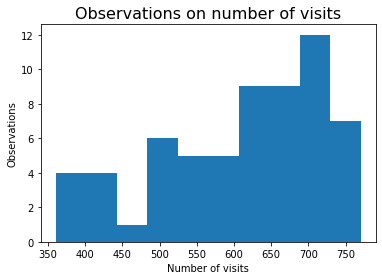

Text(0.5, 1.0, 'Observations on number of visits')

Text(0.5, 0, 'Number of visits')

Text(0, 0.5, 'Observations')

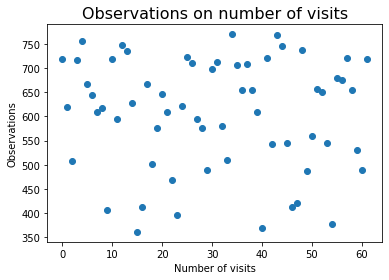

percentiles: 90%, 95%, 99%: [733.7  747.9  769.39]


In [28]:
#checking visits
visits = visits.drop_duplicates()
visits.info()

plt.hist(visits['visits'])
plt.title('Observations on number of visits', fontsize = 16)
plt.xlabel('Number of visits')
plt.ylabel('Observations')
plt.show()

x_values = pd.Series(range(0, len(visits['visits'])))

plt.scatter(x_values, visits['visits'])
plt.title('Observations on number of visits', fontsize = 16)
plt.xlabel('Number of visits')
plt.ylabel('Observations')
plt.show()
print('percentiles: 90%, 95%, 99%:', np.percentile(visits['visits'], [90, 95, 99]))

**Seems like there are no outliers that need to be cared of.**

In [29]:
visits['date'].value_counts()

2019-08-27    2
2019-08-24    2
2019-08-08    2
2019-08-14    2
2019-08-20    2
2019-08-26    2
2019-08-01    2
2019-08-07    2
2019-08-13    2
2019-08-19    2
2019-08-25    2
2019-08-31    2
2019-08-06    2
2019-08-12    2
2019-08-18    2
2019-08-30    2
2019-08-21    2
2019-08-05    2
2019-08-11    2
2019-08-17    2
2019-08-23    2
2019-08-29    2
2019-08-04    2
2019-08-10    2
2019-08-16    2
2019-08-22    2
2019-08-28    2
2019-08-03    2
2019-08-09    2
2019-08-15    2
2019-08-02    2
Name: date, dtype: int64

**In each one of those dates there were visits from group A and also from group B, so in visits I will leave it as it is.** 

# Prioritizing Hypotheses

In [30]:
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


*Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.*

In [31]:
#ICE
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) /hypotheses['effort']
print('Our hypotheses is prioritized by ICE:')
hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
pd.options.display.max_colwidth = 210

Our hypotheses is prioritized by ICE:


,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


*Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.*

In [32]:
#RICE
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) /hypotheses['effort']
print('Our hypotheses is prioritized by RICE:')
hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
pd.options.display.max_colwidth = 210

Our hypotheses is prioritized by RICE:


,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


*Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.*

In [33]:
hypotheses

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2


**In RICE we use 'reach' in our calculations that means that we have more variables than ICE, second of all it's newer approach than ICE, For an online store its better to prioritize RICE.** 

# Part 2. A/B Test Analysis

*Graph cumulative revenue by group. Make conclusions and conjectures.*

In [34]:
grouping_revenue = pd.pivot_table(orders, values = 'revenue', index='date', columns = 'group', aggfunc=np.sum)
cumulative_revenue_grouping = grouping_revenue.cumsum()
cumulative_revenue_grouping.head()

group,A,B
date,,
2019-08-01,2266.6,967.2
2019-08-02,3734.9,3535.3
2019-08-03,5550.1,4606.9
2019-08-04,6225.6,6138.5
2019-08-05,7623.6,7587.8


<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, 'Cumulative revenue by group and date')

Text(0.5, 0, 'date')

Text(0, 0.5, 'cumulative revenue')

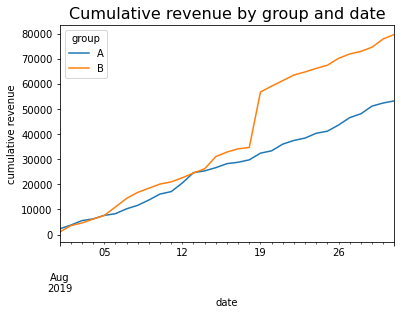

In [35]:
cumulative_revenue_grouping.plot()
plt.title('Cumulative revenue by group and date', fontsize = 16)
plt.xlabel('date')
plt.ylabel('cumulative revenue')
plt.show()
cumulative_revenue_grouping = pd.DataFrame(cumulative_revenue_grouping.to_records())

**Both groups start from the same start point(which makes sense because the test started at the same time), after a while we can see that group B is leading. This can be caused either from alot of orders or orders that are expensive.** 

*Graph cumulative average order size by group. Make conclusions and conjectures.*

In [36]:
average_ordersize_grouping = pd.pivot_table(orders, values='revenue', index='date', columns='group', aggfunc=np.average)
cumulative_average_grouping = average_ordersize_grouping    #.cumsum()
average_ordersize_grouping.head()

group,A,B
date,,
2019-08-01,98.547826,56.894118
2019-08-02,77.278947,111.656522
2019-08-03,75.633333,76.542857
2019-08-04,61.409091,109.400000
2019-08-05,63.545455,69.014286


**This plot shows us for every date the average revenue for each group.**

<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, 'Average order size by group and date')

Text(0.5, 0, 'date')

Text(0, 0.5, 'revenue average')

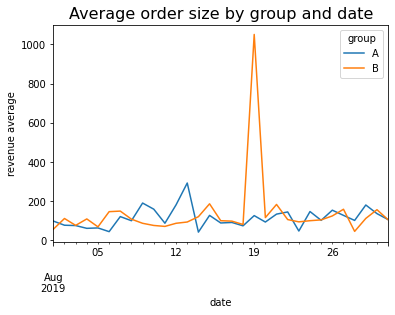

In [37]:
average_ordersize_grouping.plot()
plt.title('Average order size by group and date', fontsize=16)
plt.xlabel('date')
plt.ylabel('revenue average')
plt.show()

**Seems like group B is leading here aswell specialy around day 19 there is a peak, maybe it's because as I mentioned earlier because the number of purchases or maybe it's about the expensive stuff or maybe the anomalies made group B to lead.** 
 

In [38]:
datesgrouping = orders[['date', 'group']].drop_duplicates()

aggregated_orders = datesgrouping.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid': pd.Series.nunique, 'visitorid': pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date', 'group'])
aggregated_visits = datesgrouping.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits': 'sum'}), axis=1).sort_values(by=['date', 'group'])

cumulative_data = aggregated_orders.merge(aggregated_visits, left_on=['date','group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()


cumulativerevenueA = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativerevenueB = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Cumulative average order size by group and date')

Text(0.5, 0, 'date')

Text(0, 0.5, 'revenue average')

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

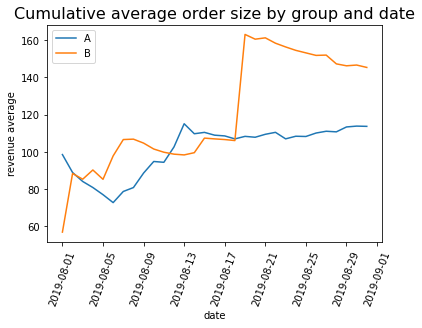

In [39]:
plt.plot(cumulativerevenueA['date'], cumulativerevenueA['revenue']/cumulativerevenueA['orders'], label='A')

plt.plot(cumulativerevenueB['date'], cumulativerevenueB['revenue']/cumulativerevenueB['orders'], label='B')
plt.xticks(rotation = 70)
plt.legend()
plt.title('Cumulative average order size by group and date', fontsize=16)
plt.xlabel('date')
plt.ylabel('revenue average')
plt.xticks(rotation = 70)
plt.show()


**The x axe is arranged by dates and this graph basically means the same as the graph before, here as well group B is mostly leading.** 

*Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.*

In [40]:
cumulative_average_grouping = pd.DataFrame(cumulative_average_grouping.to_records())
cumulative_average_grouping.head()

,date,A,B
0,2019-08-01,98.547826,56.894118
1,2019-08-02,77.278947,111.656522
2,2019-08-03,75.633333,76.542857
3,2019-08-04,61.409091,109.400000
4,2019-08-05,63.545455,69.014286


In [41]:
cumulative_average_grouping['difference'] = cumulative_average_grouping['B'] - cumulative_average_grouping['A']
cumulative_average_grouping.head()

,date,A,B,difference
0,2019-08-01,98.547826,56.894118,-41.653708
1,2019-08-02,77.278947,111.656522,34.377574
2,2019-08-03,75.633333,76.542857,0.909524
3,2019-08-04,61.409091,109.400000,47.990909
4,2019-08-05,63.545455,69.014286,5.468831


In [42]:
#Absolute
difference_by_date = cumulative_average_grouping.drop(['A', 'B'], axis = 1)
difference_by_date.head()

difference_by_date_cumsum = difference_by_date['difference'].cumsum()
difference_by_date_cumsum.head()

,date,difference
0,2019-08-01,-41.653708
1,2019-08-02,34.377574
2,2019-08-03,0.909524
3,2019-08-04,47.990909
4,2019-08-05,5.468831


0   -41.653708
1    -7.276134
2    -6.366610
3    41.624299
4    47.093130
Name: difference, dtype: float64

,date,A,B
0,2019-08-01,23,17
1,2019-08-02,19,23
2,2019-08-03,24,14
3,2019-08-04,11,14
4,2019-08-05,22,21


Text(0.5, 1.0, 'Cumulative difference between group A and B in average order size by days')

Text(0.5, 0, 'dates')

Text(0, 0.5, 'Cumulative difference between group A and B in average order size')

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

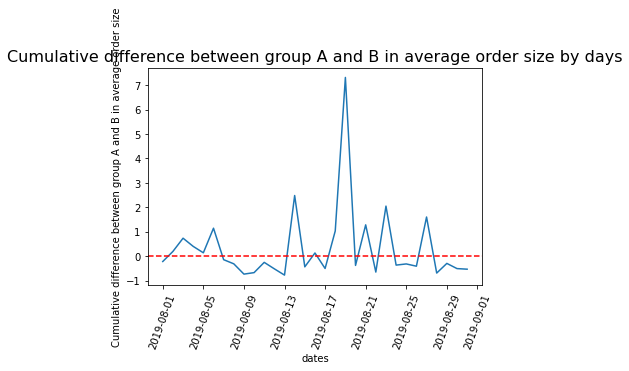

In [43]:
grouping_number_orders = pd.pivot_table(orders, values='transactionid', index='date', columns='group', aggfunc=lambda x: len(x.unique()))
grouping_number_orders = pd.DataFrame(grouping_number_orders.to_records())
grouping_number_orders.head()

plt.plot(difference_by_date['date'], (cumulative_average_grouping['B']/grouping_number_orders['B'])/ (cumulative_average_grouping['A']/grouping_number_orders['A'])-1)
plt.title('Cumulative difference between group A and B in average order size by days', fontsize=16)
plt.xlabel('dates')
plt.ylabel('Cumulative difference between group A and B in average order size')
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=70)
plt.show()


**There are 2 main peaks first one in 13.8 and second one around 17.8.**

*Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.*

In [44]:
grouping_number_visits = pd.pivot_table(visits, values='visits', index='date', columns='group', aggfunc=np.sum)
grouping_number_visits = pd.DataFrame(grouping_number_visits.to_records())
grouping_number_visits.head()

,date,A,B
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


In [45]:
conversionA = grouping_number_orders['A']/grouping_number_visits['A']
conversionB = grouping_number_orders['B']/grouping_number_visits['B']

dates = grouping_number_orders['date']

print(f'Converion rate for group A is:')
conversionA.head()
print(f'Converion rate for group B is:')
conversionB.head()
print(f'Converion rate average observation for group A is:')
conversionA.mean()
print(f'Converion rate average observation for group B is:')
conversionB.mean()


Converion rate for group A is:


0    0.031989
1    0.030695
2    0.047337
3    0.015342
4    0.029101
Name: A, dtype: float64

Converion rate for group B is:


0    0.023843
1    0.039587
2    0.027505
3    0.018182
4    0.029703
Name: B, dtype: float64

Converion rate average observation for group A is:


0.025890306958716493

Converion rate average observation for group B is:


0.030424002805202716

**The conversion rate for group B is a bit higher.**

Text(0.5, 1.0, 'conversion rates for group A and B and date')

Text(0.5, 0, 'date')

Text(0, 0.5, 'conversion rates for group A and B')

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

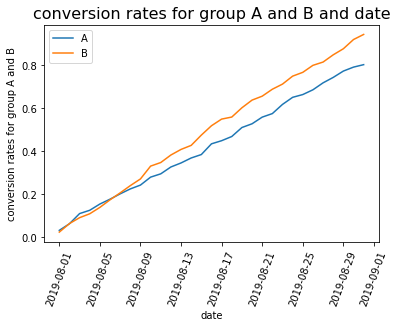

In [46]:
#calculating cumulative conversion and plotting
conversionA_cumsum = conversionA.cumsum()
conversionB_cumsum = conversionB.cumsum()

plt.plot(dates, conversionA_cumsum, label = 'A')
plt.plot(dates, conversionB_cumsum, label = 'B')
plt.legend()
plt.title('conversion rates for group A and B and date', fontsize=16)
plt.xlabel('date')
plt.ylabel('conversion rates for group A and B')
plt.xticks(rotation=70)
plt.show()

**Both groups started from the same set point, we can see the that group B is leading sense it got a higher conversion rate.**

Text(0.5, 1.0, 'conversion rates by group and date')

Text(0.5, 0, 'date')

Text(0, 0.5, 'conversion rates by group')

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

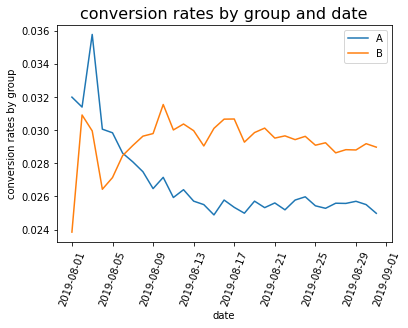

In [47]:
#calculating cumulative conversion and plotting with out cumsum
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
cumulative_dataA = cumulative_data[cumulative_data['group'] == 'A']
cumulative_dataB = cumulative_data[cumulative_data['group'] == 'B']

plt.plot(cumulative_dataA['date'], cumulative_dataA['conversion'], label = 'A')
plt.plot(cumulative_dataB['date'], cumulative_dataB['conversion'], label = 'B')
plt.legend()
plt.title('conversion rates by group and date', fontsize=16)
plt.xlabel('date')
plt.ylabel('conversion rates by group')
plt.xticks(rotation=70)
plt.show()

**At first we can see that the conversion rate for A was higher but steadily went down and group B took the lead.**

Text(0.5, 1.0, 'Relative gain for A in contrast to B')

Text(0.5, 0, 'date')

Text(0, 0.5, 'Relative gain in conversion')

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

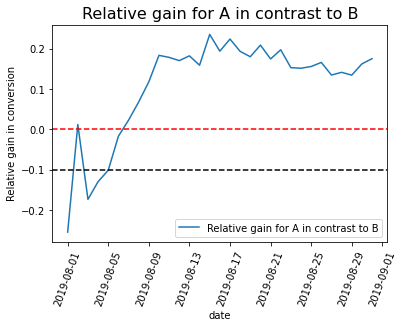

In [48]:
plt.plot(dates, conversionB_cumsum / conversionA_cumsum -1, label = 'Relative gain for A in contrast to B')
plt.legend()

plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=-0.1, color='black', linestyle='--')
plt.title('Relative gain for A in contrast to B', fontsize=16)
plt.xlabel('date')
plt.ylabel('Relative gain in conversion')
plt.xticks(rotation=70)
plt.show()

**At first group A was leading but then it started to lag behind and group B took the lead.**

*Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.*

In [49]:
orders_users = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
orders_users.columns = ['visitorid', 'orders']
print(orders_users.sort_values(by='orders', ascending = False).head())

      visitorid  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3


(array([937.,   0.,   0.,   0.,   0.,  29.,   0.,   0.,   0.,   7.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'orders by users')

Text(0.5, 0, 'orders')

Text(0, 0.5, 'users')

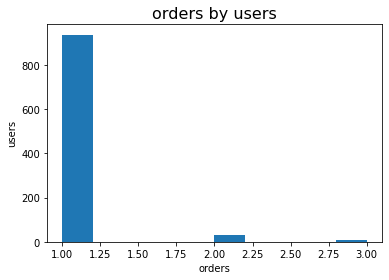

In [50]:
#hist 
plt.hist(orders_users['orders'])
plt.title('orders by users', fontsize=16)
plt.xlabel('orders')
plt.ylabel('users')
plt.show()

**This plot shows us how much orders each user made, we can see here that alot of users have made 1 purchase, not so many did 2 purchases.**

Text(0.5, 1.0, 'orders by users')

Text(0.5, 0, 'orders')

Text(0, 0.5, 'users')

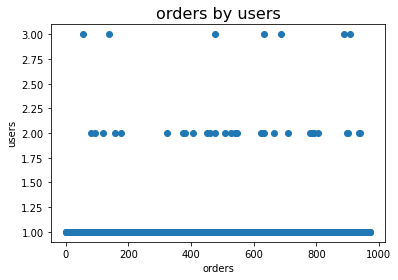

In [51]:
#scatter
x_values = pd.Series(range(0, len(orders_users)))
plt.scatter(x_values, orders_users['orders'])
plt.title('orders by users', fontsize=16)
plt.xlabel('orders')
plt.ylabel('users')
plt.show()

**This plot shows us as well that the users have made 1 purchase but haven't made another purchase maybe the company should put a little work into it and improve it.**

*Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.*

In [52]:
print('percentiles: 90%, 95%, 99%:', np.percentile(orders_users['orders'], [90,95,99]))

percentiles: 90%, 95%, 99%: [1. 1. 2.]


**Most of the users make 1 order, so any user buying more than 1 purchace is anomaly(seems like only 10% of users repurchase).**

*Plot a scatter chart of order prices. Make conclusions and conjectures.*

(array([1.014e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+00, 1.996540e+03, 3.988080e+03, 5.979620e+03,
        7.971160e+03, 9.962700e+03, 1.195424e+04, 1.394578e+04,
        1.593732e+04, 1.792886e+04, 1.992040e+04]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'orders revenue')

Text(0.5, 0, 'revenue')

Text(0, 0.5, 'orders')

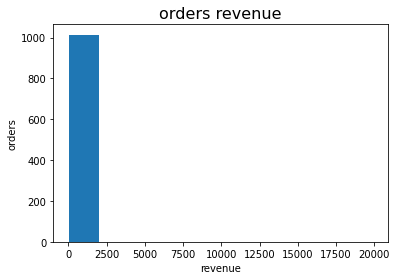

In [53]:
#hist orders
plt.hist(orders['revenue'])
plt.title('orders revenue', fontsize=16)
plt.xlabel('revenue')
plt.ylabel('orders')
plt.show()

**Our revenue from the orders are less than 2500.**

Text(0.5, 1.0, 'orders revenue')

Text(0.5, 0, 'orders')

Text(0, 0.5, 'revenue')

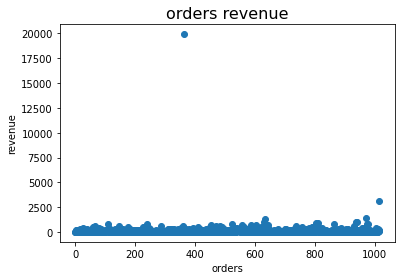

In [54]:
#scatter orders
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('orders revenue', fontsize=16)
plt.xlabel('orders')
plt.ylabel('revenue')
plt.show()

**Here also we can see that our revenue is less than 2500 and there are 2 outliers, one at 2500 and the second one around 20,000.**

*Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.*

In [55]:
print('percentiles: 90%, 95%, 99%:', np.percentile(orders['revenue'], [90,95,99]))

percentiles: 90%, 95%, 99%: [280.8   414.275 830.3  ]


**90% of the purchases had revenue lower than 280.8 that's low! that means that only 10% of the users repurchase the product.**

*Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.*

In [56]:
alpha = 0.05

orders_by_usersA = orders[orders['group'] == 'A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
orders_by_usersA.columns = ['visitorid', 'transactionid']

orders_by_usersB = orders[orders['group'] == 'B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
orders_by_usersA.columns = ['visitorid', 'transactionid']

group_A = pd.concat([orders_by_usersA['transactionid'], pd.Series(0, index=np.arange(visits[visits['group']== 'A']['visits'].sum() - len(orders_by_usersA['transactionid'])), name='transactionid')], axis=0)
group_B = pd.concat([orders_by_usersB['transactionid'], pd.Series(0, index=np.arange(visits[visits['group']== 'B']['visits'].sum() - len(orders_by_usersB['transactionid'])), name='transactionid')], axis=0)

print('Relative gain: ' "{0:.3f}".format(group_B.mean() / group_A.mean()-1))

result = st.mannwhitneyu(group_A, group_B)[1]

# print('p-value: ',  "{0:.3f}".format(result))
print('p-value:', stats.mannwhitneyu(group_A, group_B)[1])

if (result < alpha):
    print('we reject the null hypothesis')
else:
    print('we can\'t reject the null hypothesis')

Relative gain: 0.160
p-value: 0.011018084110014696
we reject the null hypothesis


**done and actually it makes more sense, thank you**

**The null hypothesis was that both groups are the same and basically they are not because turns out the p-value is 0.011 which is smaller than 0.05.**

*Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.*

In [57]:
print('significance_of_difference: ' , "{0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean()/orders[orders['group'] == 'A']['revenue'].mean()-1))

result = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]

print('p-value: ',result)

if result < alpha:
    print('we reject the null hypothesis')
else:
    print('we can\'t reject the null hypothesis')

significance_of_difference:  0.278
p-value:  0.8622329690015668
we can't reject the null hypothesis


**p-value is 0.862 which is higher than 0.05 that means that we can't reject the null hypothesis and conclude that average order size differs for each group. Although group B did lead on group A and had more peaks**

In [58]:
print('group A orders revenue mean:', "{:.3f}".format(orders_a['revenue'].mean()))
print('group B orders revenue mean:', "{:.3f}".format(orders_b['revenue'].mean()))

group A orders revenue mean: 115.897
group B orders revenue mean: 145.063


*Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.*

In [59]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


In [60]:
users_high_orders = pd.concat([orders_by_usersA[orders_by_usersA['transactionid'] > 1]['visitorid'], orders_by_usersB[orders_by_usersB['transactionid'] > 1]['visitorid']], axis=0)
users_expensive_orders = orders[orders['revenue'] > 414.275]['visitorid']
abnormal_users = pd.concat([users_high_orders, users_expensive_orders], axis=0).drop_duplicates().sort_values()
abnormal_users.head()
print(abnormal_users.shape)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorid, dtype: int64

(86,)


**We have about 86 outliers.**

In [61]:
# checking without those 86 anomalous users
sample_A_filtered = pd.concat([orders_by_usersA[np.logical_not(orders_by_usersA['visitorid'].isin(abnormal_users))]['transactionid'], pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders_by_usersA['transactionid'])), name='transactionid')], axis=0)
sample_B_filtered = pd.concat([orders_by_usersB[np.logical_not(orders_by_usersB['visitorid'].isin(abnormal_users))]['transactionid'], pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders_by_usersB['transactionid'])), name='transactionid')], axis=0)

print('relative gain: ', "{0:.3f}".format(sample_B_filtered.mean() / sample_A_filtered.mean() - 1))

result = st.mannwhitneyu(sample_A_filtered , sample_B_filtered)[1]

print('P-value: ',result)
if result < alpha:
    print('we reject the null hypothesis')
else:
    print('we can\'t reject the null hypothesis')

relative gain:  0.174
P-value:  0.01593020716573973
we reject the null hypothesis


**The p value is less than 0.05 which means that we reject the null hypothesis, the null hypothesis was that the 2 groups are basically the same and now that we rejected it it means that they differ.**

*Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.*

In [62]:
print('significance of difference:', "{0:.3f}".format(
orders[np.logical_and(orders['group'] =='B', np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(orders['group'] =='A', np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'].mean() - 1))
result = st.mannwhitneyu(orders[np.logical_and(orders['group'] =='A', np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'],
                         orders[np.logical_and(orders['group'] =='B', np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'])[1]

print('P-value: ', result)
if result < alpha:
    print('we reject the null hypothesis')
else:
    print('we can\'t reject the null hypothesis')

significance of difference: -0.033
P-value:  0.7711877309994826
we can't reject the null hypothesis


**We can't reject the null hypothesis means the average size between the groups doesn't have a difference.**

*Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.*

**Group B is leading since it has:
a higher cumulative revenue by group and date.
a higher average order size by group and date, especially around the day 19 there was a peak that I thought it maybe is related to number of purchases or maybe is related to buying expensive stuff.
And also group B had a higher cumulative average order size by group and date plus group B has a higher conversion rate (at first group A had a higher conversion rate but then group B took the lead.**

**Most of the users made 1 order, so any user purchasing more than 1 item was an outlier. And the revenue from the orders was less than 2500 which means that maybe we should improve our product or improve the customer service.**

**When doing the percentiles 90% of the purchases had revenue lower than 280.8 which is low.**

**when checking the statistical significance of the difference in conversion between the groups using the raw data we rejected the null hypothesis which was was that both groups are the same and basically they are not because turns out the p-value is 0.011 which is smaller than 0.05.
when checking the statistical significance of the difference in average order size between the groups using the raw data, p-value is 0.862 which is higher than 0.05 that means that we can't reject the null hypothesis and conclude that average order size differs for each group. Although group B did lead on group A and had more peaks.**

**from the graphs I plotted before and tests made we can say that the model had stabalised and we can tell that we should stop the test and announce on group B as a winner of the test.**



# Conclusion

**In the project I checked a hypothesis with A\B test and plotted some graphes. Our winner was group B.
Group B had better results than group A.
the hypothesis in the beggining of the project were prioritized by RICE, since we use 'reach' in our calculations that means that we have more variables than ICE. Also RICE is newer approach than ICE, For an online store its better to prioritize RICE.** 